In [3]:
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor, plot_importance
from sklearn.metrics import mean_squared_error


# Load your data
df = pd.read_excel("combined_data.xlsx")

# Drop missing values
df = df.dropna(subset=['tempmax', 'humidity', 'precip', 'temp'])
df = df.ffill()

# Rename precip_mm to rainfall
df = df.rename(columns={'precip': 'rainfall'})

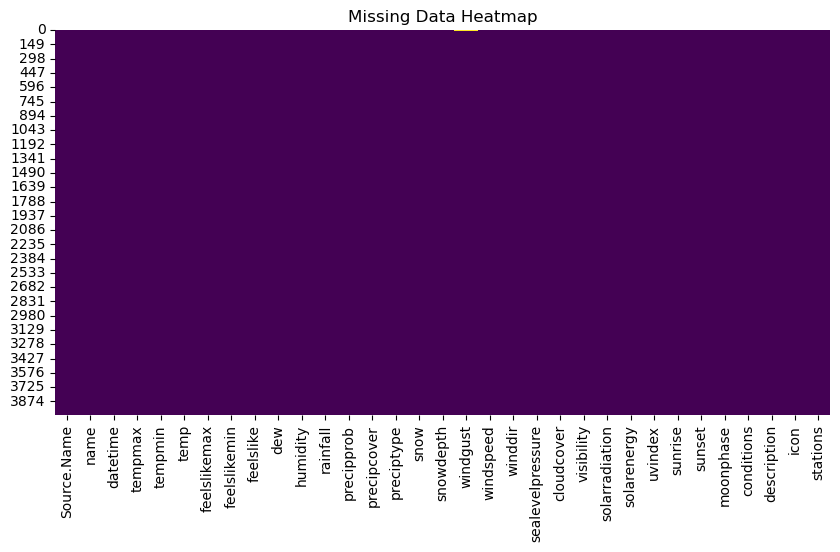

In [6]:
import seaborn as sns

# Plot missing values heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Data Heatmap")
plt.show()

In [7]:
# checking the datatype for each column
df.dtypes

Source.Name                 object
name                        object
datetime            datetime64[ns]
tempmax                    float64
tempmin                    float64
temp                       float64
feelslikemax               float64
feelslikemin               float64
feelslike                  float64
dew                        float64
humidity                   float64
rainfall                   float64
precipprob                   int64
precipcover                float64
preciptype                  object
snow                         int64
snowdepth                    int64
windgust                   float64
windspeed                  float64
winddir                    float64
sealevelpressure           float64
cloudcover                 float64
visibility                 float64
solarradiation             float64
solarenergy                float64
uvindex                      int64
sunrise             datetime64[ns]
sunset              datetime64[ns]
moonphase           

In [8]:
# find duplicate rows
duplicate_rows = df.duplicated()

# print duplicate rows
print(duplicate_rows)

0       False
1       False
2       False
3       False
4       False
        ...  
4013    False
4014    False
4015    False
4016    False
4017    False
Length: 4018, dtype: bool


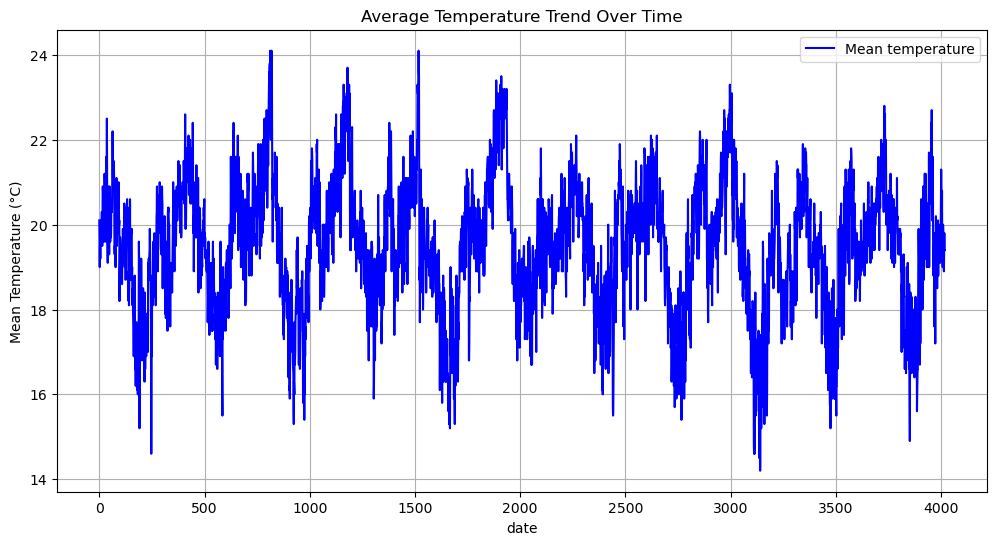

In [9]:
# Plot of average temperature trend over time
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["temp"], label="Mean temperature", color="blue")
plt.xlabel("date")
plt.ylabel("Mean Temperature (°C)")
plt.title("Average Temperature Trend Over Time")
plt.legend()
plt.grid()
plt.show()

In [14]:
# Features and target
X = df[['tempmax', 'humidity', 'rainfall']]
y = df['temp']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost model
model = XGBRegressor(n_estimators=100, max_depth=6, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

# Save the trained model
joblib.dump(model, "temp_model.pkl")

# Predict
y_pred = model.predict(X_test)










R² Score: 0.8384515055828395


In [11]:
# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 0.41
R-squared: 0.84


<Figure size 1000x800 with 0 Axes>

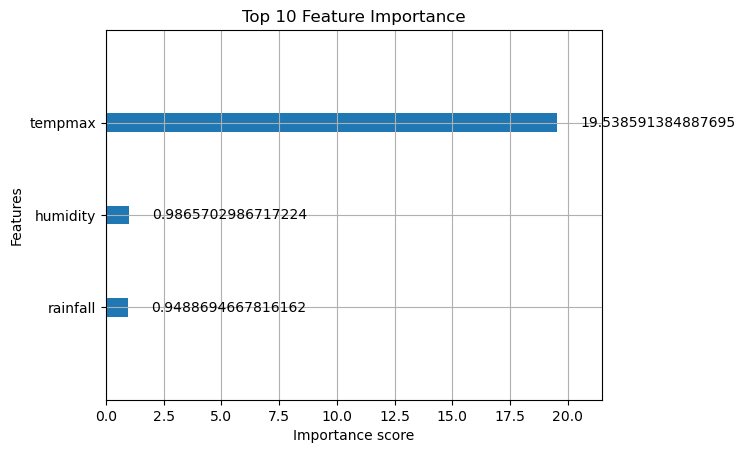

In [12]:
# Feature Importance Analysis
# Method 1: Using plot_importance(visualization)
plt.figure(figsize=(10, 8))
plot_importance(model, importance_type='gain', max_num_features=10) # Show top 10 features
plt.title("Top 10 Feature Importance")
plt.show()